## Trying to modify a PyTorch tutorial to suit our needs

In [1]:
%matplotlib inline

In [2]:
import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
from torch.autograd import Variable

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Make a simple environment that satisfies openAI gym requirements
# Ref: https://towardsdatascience.com/creating-a-custom-openai-gym-environment-for-stock-trading-be532be3910e
# Ref: https://github.com/openai/gym/blob/master/docs/creating-environments.md
U_VELOCITY = 1
U_ACCELERATION = 2
O_VELOCITY = 1
O_ACCELERATION = 2

input_type = U_ACCELERATION
observe_type = O_VELOCITY
N = 10
env = gym.make('ConsensusEnv:ConsensusContEnv-v0', N=N, dt=0.1, Delta=0.05,
              input_type=input_type, observe_type=observe_type).unwrapped


### Replay Memory and other packages



### Test out functions to auto-run the training and testing

In [4]:
from utils.ReplayMemory import * 
from utils.networks import *
from utils.agents import *

from importlib import reload
import utils
reload(utils.ReplayMemory)
reload(utils.networks)
reload(utils.agents)

<module 'utils.agents' from '/Users/zz/Documents/GT20F/7000/GNN_experiments/utils/agents.py'>

In [7]:
reload(utils.ReplayMemory)
reload(utils.networks)
reload(utils.agents)
from utils.ReplayMemory import * 
from utils.networks import *
from utils.agents import *


In [5]:
na = env.na
ns = env.nf
hidden = 32

test_agents = [
    LearnerAgent(device, N, ns, na, hidden),
    RewardAgent(device, N, ns, na, hidden),
    RewardActionAgent(device, N, ns, na, hidden)
]

num_episode=5
test_interval=2
num_test=2
num_iteration=200
BATCH_SIZE=128
debug=True
num_sample=50

if input_type == U_ACCELERATION:
    action_space = [-env.a_max, env.a_max]
else:
    action_space = [-env.v_max, env.v_max]


In [114]:
# Test run
for agent in test_agents:
    train(agent, env, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, action_space, debug)

Episode  0  finished; t =  199
Finished episode  0  with  199  steps, and rewards =  [-251.11914981 -291.36713243 -220.24629986 -237.88564374 -243.02959101
 -372.25400294 -265.6448024  -391.98667503 -321.9655733  -307.10024736] ;
cumulative reward =  -271310.589116754
Finished episode  1  with  199  steps, and rewards =  [-350.86176789 -384.78971752 -298.12004072 -405.14136268 -374.80127399
 -479.67580277 -383.49706958 -427.52902349 -263.57492306 -269.16934183] ;
cumulative reward =  -341555.8227882968
Episode  1  finished; t =  199
Episode  2  finished; t =  199
Finished episode  0  with  199  steps, and rewards =  [-441.87989561 -454.44968415 -635.27043628 -660.64520187 -433.35208989
 -635.10477321 -428.33539534 -388.6669188  -433.48192649 -529.32743464] ;
cumulative reward =  -453539.35288381006
Finished episode  1  with  199  steps, and rewards =  [-1486.52939612 -1099.55527799 -1486.45847416 -1008.37178213
 -1487.314863   -1017.43118255 -1221.08864964 -1052.20055909
 -1307.9215753

KeyboardInterrupt: 

In [6]:
# Real run
num_episode=500
test_interval=50
num_test=20
num_iteration=200
BATCH_SIZE=128
debug=False
# num_sample=50

agent1 = LearnerAgent(device, N, ns, na, hidden)
a1hist = train(agent1, env, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, action_space, debug)

Test result at episode  0
Took  99  steps to converge
Finished episode  0  with  99 ;
cumulative reward =  -4314.68178065254
Finished episode  1  with  199 ;
cumulative reward =  -22076.033485254622
Took  132  steps to converge
Finished episode  2  with  132 ;
cumulative reward =  -14837.78344482907
Took  99  steps to converge
Finished episode  3  with  99 ;
cumulative reward =  -8539.266339615975
Took  153  steps to converge
Finished episode  4  with  153 ;
cumulative reward =  -12715.55367379755
Finished episode  5  with  199 ;
cumulative reward =  -17448.84475412078
Took  186  steps to converge
Finished episode  6  with  186 ;
cumulative reward =  -11381.30331411782
Took  109  steps to converge
Finished episode  7  with  109 ;
cumulative reward =  -10375.658744607448
Took  186  steps to converge
Finished episode  8  with  186 ;
cumulative reward =  -14858.191163654928
Took  79  steps to converge
Finished episode  9  with  79 ;
cumulative reward =  -5326.252007568048
Took  134  steps

In [7]:
# Real run
num_episode=500
test_interval=50
num_test=20
num_iteration=200
BATCH_SIZE=128
debug=False
env2 = gym.make('ConsensusEnv:ConsensusContEnv-v0', N=N, dt=0.1, Delta=0.05,
              input_type=input_type, observe_type=O_ACCELERATION).unwrapped
agent4 = LearnerAgent(device, N, env2.ns, env2.na, hidden)
a4hist = train(agent4, env2, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, action_space, debug)

Test result at episode  0
Finished episode  0  with  199 ;
cumulative reward =  -16338.826646201742
Finished episode  1  with  199 ;
cumulative reward =  -12455.095716841332
Finished episode  2  with  199 ;
cumulative reward =  -9839.494291086286
Took  165  steps to converge
Finished episode  3  with  165 ;
cumulative reward =  -11156.634993743024
Finished episode  4  with  199 ;
cumulative reward =  -28193.348964943518
Took  35  steps to converge
Finished episode  5  with  35 ;
cumulative reward =  -679.8317379085505
Finished episode  6  with  199 ;
cumulative reward =  -10007.597662945722
Took  169  steps to converge
Finished episode  7  with  169 ;
cumulative reward =  -12565.321048305836
Finished episode  8  with  199 ;
cumulative reward =  -10251.479711453601
Took  57  steps to converge
Finished episode  9  with  57 ;
cumulative reward =  -2711.9868151024993
Finished episode  10  with  199 ;
cumulative reward =  -10550.53075574147
Took  169  steps to converge
Finished episode  11 

In [8]:
# Real run
num_episode=500
test_interval=50
num_test=20
num_iteration=200
BATCH_SIZE=128
debug=False
num_sample=50

agent2 = RewardAgent(device, N, ns, na, hidden)
a2hist = train(agent2, env, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, action_space, debug)

Test result at episode  0
Took  17  steps to converge
Finished episode  0  with  17 ;
cumulative reward =  -1288.5595338277585
Took  22  steps to converge
Finished episode  1  with  22 ;
cumulative reward =  -1798.9139804532465
Took  18  steps to converge
Finished episode  2  with  18 ;
cumulative reward =  -1489.8759030800295
Took  17  steps to converge
Finished episode  3  with  17 ;
cumulative reward =  -1448.423887887857
Took  22  steps to converge
Finished episode  4  with  22 ;
cumulative reward =  -1855.4319110567665
Took  23  steps to converge
Finished episode  5  with  23 ;
cumulative reward =  -1420.3477309046607
Took  22  steps to converge
Finished episode  6  with  22 ;
cumulative reward =  -1502.672846994754
Took  35  steps to converge
Finished episode  7  with  35 ;
cumulative reward =  -3042.9041584092706
Took  20  steps to converge
Finished episode  8  with  20 ;
cumulative reward =  -1469.3617134198325
Took  27  steps to converge
Finished episode  9  with  27 ;
cumulat

In [13]:
# Real run
num_episode=500
test_interval=50
num_test=20
num_iteration=200
BATCH_SIZE=128
debug=False
num_sample=50

agent3 = RewardActionAgent(device, N, ns, na, hidden)
a3hist = train(agent3, env, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, action_space, debug)

Test result at episode  0
Took  33  steps to converge
Finished episode  0  with  33 ;
cumulative reward =  -4015.3401921563964
Took  27  steps to converge
Finished episode  1  with  27 ;
cumulative reward =  -2468.18956354625
Took  32  steps to converge
Finished episode  2  with  32 ;
cumulative reward =  -3325.40063067563
Took  39  steps to converge
Finished episode  3  with  39 ;
cumulative reward =  -4844.278389525747
Took  34  steps to converge
Finished episode  4  with  34 ;
cumulative reward =  -3910.5814535276477
Took  36  steps to converge
Finished episode  5  with  36 ;
cumulative reward =  -4043.9231612566973
Took  27  steps to converge
Finished episode  6  with  27 ;
cumulative reward =  -2844.5921399634026
Took  28  steps to converge
Finished episode  7  with  28 ;
cumulative reward =  -2980.7105458133947
Took  25  steps to converge
Finished episode  8  with  25 ;
cumulative reward =  -1868.815955183464
Took  32  steps to converge
Finished episode  9  with  32 ;
cumulative 

## Plot your result

In [10]:
# Randomly give a test
def plot_test(agent, env, fnames=[], num_iteration=100, action_space=[-1,1], imdir=''):
    reward_hist_hst = []
    N=env.N
    for e,f in enumerate(fnames):
        steps = 0
        agent.net.eval()
        cum_reward = 0
        reward_hist = []

        state = env.reset()
        state = torch.from_numpy(state).float()
        state = Variable(state)
        env.render()

        for t in range(num_iteration):  
            # Try to pick an action, react, and store the resulting behavior in the pool here
            actions = []
            for i in range(N):
                action = agent.select_action(state[i], **{
                    'steps_done':t, 'rand':False, 'num_sample':50, 'action_space':action_space
                })
                actions.append(action)
            action = np.array(actions).T 

            next_state, reward, done, _ = env.step(action)
            next_state = Variable(torch.from_numpy(next_state).float()) # The float() probably avoids bug in net.forward()
            state = next_state
            cum_reward += sum(reward)
            reward_hist.append(reward)

            if len(f) > 0:
                img = env.render(mode="rgb_array")
                plt.imshow(img)
                plt.savefig(imdir + f + '-{:03d}.jpg'.format(t))
            steps += 1

            if done:
                print("Took ", t, " steps to converge")
                break
        print("Finished episode ", e, " with ", t, #" steps, and rewards = ", reward, 
              ";\ncumulative reward = ", cum_reward)
        reward_hist_hst.append(reward_hist)
    return reward_hist_hst

Took  37  steps to converge
Finished episode  0  with  37 ;
cumulative reward =  -1465.1837352449818
Took  52  steps to converge
Finished episode  1  with  52 ;
cumulative reward =  -5876.460238255958


[[array([-2.33716208, -3.73704451, -5.02747582, -2.40692553, -2.44740167,
         -3.94679476, -2.60440141, -3.27951971, -3.72613077, -2.23344064]),
  array([-2.11748844, -3.67484099, -4.46607012, -2.24298366, -2.62978105,
         -3.81602095, -2.32447237, -3.37081021, -4.24260602, -2.12890889]),
  array([-2.24922877, -3.54982402, -3.86582979, -2.21011796, -2.78932804,
         -3.59746529, -2.37276267, -3.53157339, -4.75010102, -2.17938635]),
  array([-2.48267773, -3.35607537, -3.22638907, -2.29713953, -2.88043377,
         -3.29900077, -2.5667454 , -3.66235269, -5.24366637, -2.22262514]),
  array([-2.66451562, -3.07711079, -2.73503456, -2.32065565, -2.98349115,
         -2.93475338, -2.77070226, -3.71837397, -5.69998311, -2.21436741]),
  array([-2.80352244, -2.75844528, -2.4433168 , -2.27927635, -3.0840326 ,
         -2.57695253, -3.00674093, -3.67907969, -6.03509721, -2.16523519]),
  array([-2.88810805, -2.48467771, -2.21814931, -2.21451538, -3.08202662,
         -2.28656731, -3.2

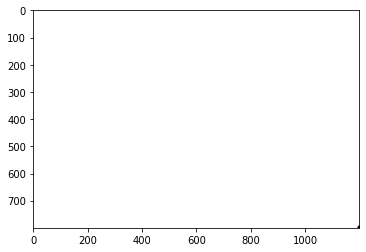

In [28]:
h1test = plot_test(agent1, env, 
          fnames=['LearnerAgent_acc_test1', 'LearnerAgent_acc_test2'], 
          num_iteration=num_iteration, action_space=action_space, imdir='screencaps/')

Finished episode  0  with  199 ;
cumulative reward =  -28482.537104550815


KeyboardInterrupt: 

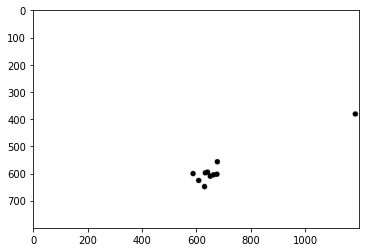

In [31]:
h2test = plot_test(agent2, env, 
          fnames=['RewardAgent_acc_test1', 'RewardAgent_acc_test2'], 
          num_iteration=num_iteration, action_space=action_space, imdir='screencaps/')

Took  32  steps to converge
Finished episode  0  with  32 ;
cumulative reward =  -3354.8674759449877


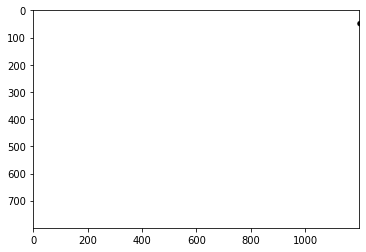

In [53]:
h3test = plot_test(agent3, env, 
          fnames=['RewardActionAgent_acc_test1'], 
          num_iteration=num_iteration, action_space=action_space, imdir='screencaps/')

Finished episode  0  with  199 ;
cumulative reward =  -34823.41160897509


KeyboardInterrupt: 

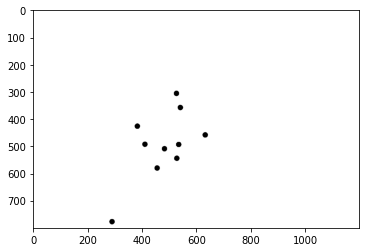

In [32]:
h4test = plot_test(agent4, env2, 
          fnames=['LearnerAgent_acc_oacc_test1', 'LearnerAgent_acc_oacc_test2'], 
          num_iteration=num_iteration, action_space=action_space, imdir='screencaps/')

In [11]:
# Plots out reward history data
def plot_reward_hist(reward_hists=[], ep_int=25, hist_names=[], log=True):
    # reward_hist : List of histories of reward histories
    # ep_int : number of episodes / size of intervals between two history lists
    # reward_hist = [ [ [ [agent 1's reward history for 1st run in ep=0],
    #                     [agent 1's reward history for 2nd run in ep=0],... ],
    #                   [ [agent 1's reward history for 1st run in ep=25],
    #                     [agent 1's reward history for 2nd run in ep=25],... ],... ],
    #                 [ same bunch of lists for agent 2 ], ...  ]
    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle('Top: Mean reward; Bottom: Iteration before done')
    
    for i,hhh in enumerate(reward_hists):
        num_ep = np.arange(len(hhh))*ep_int
        if log:
            re_avg = [ np.log(-1/np.mean([sum(h) for h in hh])) for hh in hhh ] # Mean of cumulative rewards for each ep
        else:
            re_avg = [ np.mean([sum(h) for h in hh]) for hh in hhh ] # Mean of cumulative rewards for each ep
        it_avg = [ np.mean([len(h) for h in hh]) for hh in hhh ] # Total number of iteartions for each ep
        
        wid = 1 / len(hist_names) * 0.8 * ep_int
        offset = i * wid - 0.4 * ep_int
        ax1.bar(num_ep+offset, re_avg, label=hist_names[i], width=wid)
        ax2.bar(num_ep+offset, it_avg, label=hist_names[i], width=wid)
#     ax2.title.set_text('# of episodes trained')
    ax1.set_ylabel('Reward history (average)')
    ax2.set_ylabel('Reward history (average)')
#     ax1.set_xlabel('Reward')
    ax2.set_xlabel('# of episodes trained')
    ax2.legend()
    ax1.legend()

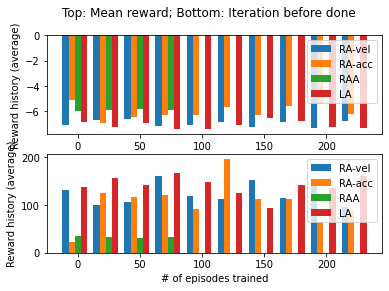

In [12]:
plot_reward_hist([a1hist, a2hist, a3hist, a4hist], 25, ['RA-vel', 'RA-acc','RAA','LA'])

In [ ]:
plot_reward_hist([a2hist, a3hist, a4hist], 25, ['RA','RAA','LA'])

In [21]:
def testfunc(a,b,**k):
    print(a,b)
    c = k.get('c',10)
    print(c)

testfunc(1,2,**{'c':9})

1 2
9


In [8]:
# Copy some of the methods from the original documentatoin here, because useful
BATCH_SIZE = 128
GAMMA = 0.999
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 100
TARGET_UPDATE = 10
n_actions = 5

# policy_net = DQN(screen_height, screen_width, n_actions).to(device)
# target_net = DQN(screen_height, screen_width, n_actions).to(device)
# target_net.load_state_dict(policy_net.state_dict())
# target_net.eval()

# Throws a coin to decide whether to randomly sample or to choose according to reward.
# Coin prob will change over time.
# This method should be called for each individual agent.
def select_action(state, steps_done, rand=True):
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    if sample > eps_threshold or (not rand):
        with torch.no_grad():
            # t.max(1) will return largest column value of each row (sample?).
            # second column on max result is index of where max element was
            # found, so we pick action with the larger expected reward.
#             print(policy_net(torch.tensor([state])))
#             print( policy_net(torch.tensor([state])).max(0))
#             print(policy_net(torch.tensor([state])).max(0)[1])
#             return policy_net(state).max(1)[1].view(1, 1)
            return policy_net(state.view(1,-1,N)).max(1)[1].view(1, 1)
    else:
        return torch.tensor([[random.randrange(n_actions)]], device=device, dtype=torch.long)
#         return torch.tensor([[random.randrange(n_actions) for i in range(state.shape[0])]], device=device, dtype=torch.long)

# Steps over gradients from memory replay
def optimize_model(batch):
    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
#     action_batch = torch.cat(torch.from_numpy(np.asarray(batch.action)))
    action_batch = torch.from_numpy(np.asarray(batch.action))
#     reward_batch = torch.cat(torch.from_numpy(batch.reward))
    reward_batch = torch.from_numpy(np.asarray(batch.reward).astype('float32'))

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
#     print(policy_net(state_batch.view(BATCH_SIZE, -1, N)).shape)
#     print(action_batch.shape)
    state_action_values = policy_net(state_batch.view(BATCH_SIZE, -1, N)).gather(1, action_batch.view(-1,1)) # gather() Gathers values along axis=1, indexed by action_batch.
#     state_action_values = policy_net(state_batch).gather(1, action_batch) # gather() Gathers values along axis=1, indexed by action_batch.

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    
    policy_net.eval()
#     print(next_state_values[non_final_mask].shape)
#     print(policy_net(non_final_next_states.view(BATCH_SIZE, 2, -1)).shape,
#           policy_net(non_final_next_states.view(BATCH_SIZE, 2, -1)).max(1))
    next_state_values[non_final_mask] = policy_net(non_final_next_states.view(BATCH_SIZE, 2, -1)).max(1)[0].detach()
#     next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch
    policy_net.train()

    # Compute Huber loss
    loss = F.smooth_l1_loss(state_action_values, expected_state_action_values.unsqueeze(1))
#     print(state_action_values.dtype)
#     print(reward_batch.dtype)
#     print((next_state_values * GAMMA).dtype)
#     print(loss.dtype)

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    for param in policy_net.parameters():
        param.grad.data.clamp_(-1, 1)
    optimizer.step()


## Evaluation of "baseline" (randomly initialized) model without training

In [11]:
reward_hist_hst = []
for e in range(20):
    steps = 0
    policy_net.eval()
    cum_reward = 0
    reward_hist = []

    state = env.reset()
    state = torch.from_numpy(state).float()
    state = Variable(state)
    env.render()

    for t in range(1000):  
        # Try to pick an action, react, and store the resulting behavior in the pool here
        actions = []
        for i in range(N):
            action = select_action(state[i], t, rand=False)
            actions.append(action)
        action = np.array(actions) 

        next_state, reward, done, _ = env.step(action)
        next_state = Variable(torch.from_numpy(next_state).float()) # The float() probably avoids bug in net.forward()
        state = next_state
        cum_reward += sum(reward)
        reward_hist.append(reward)
        
        env.render()
        steps += 1

        if done:
            episode_durations.append(t + 1)
            print("Took ", t, " steps to converge")
            break
    print("Finished episode ", e, " with ", t, " steps, and rewards = ", reward, ";\ncumulative reward = ", cum_reward)
    reward_hist_hst.append(reward_hist)

Finished episode  0  with  999  steps, and rewards =  [-1.96185936e+00 -1.32202322e-01 -8.78520483e-04  4.35960755e-02
  5.64226895e-02] ;
cumulative reward =  -2274.8263208153744
Finished episode  1  with  999  steps, and rewards =  [-1.2544571  -1.42454866 -1.78495872 -3.05502998 -2.22425435] ;
cumulative reward =  -9744.17219086518
Finished episode  2  with  999  steps, and rewards =  [-2.13945091 -5.10391078 -3.23264593 -2.14586791 -2.06340293] ;
cumulative reward =  -14736.28822871912
Finished episode  3  with  999  steps, and rewards =  [0.345376   0.28955964 0.53227181 0.51226006 0.53927592] ;
cumulative reward =  2054.903559778193
Finished episode  4  with  999  steps, and rewards =  [ 0.18131797 -0.62875714  0.32106878  0.36668325  0.21029918] ;
cumulative reward =  213.51931934050307
Finished episode  5  with  999  steps, and rewards =  [-5.64247294 -5.55359473 -2.59796394 -2.46347959 -3.11616636] ;
cumulative reward =  -19387.253427994336
Finished episode  6  with  999  step

In [12]:
# Batch History
state_pool = []
action_pool = []
reward_pool = []
steps = 0

for e in range(num_episode):
    steps = 0
    state = env.reset()
    state = torch.from_numpy(state).float()
    state = Variable(state)
    env.render()

    for t in range(num_iteration):
        policy_net.train()
        '''
        # actions = []
        # for i in range(N):
        #     # print(torch.Tensor(i), torch.Tensor([i]), torch.Tensor([[i]]))
        #     action = policy_net(state, Variable(torch.Tensor([i])))
        #     # print(i, action, action.data.numpy())
        #     action = action.data.numpy()
        #     actions.append(action)
        # # print("Final actions: ", actions)
        # action = np.array(actions).T
        # # print(action)
        '''            
        # Try to pick an action, react, and store the resulting behavior in the pool here
        actions = []
        for i in range(N):
            # Should I normalize the values into probabilities and let the agent choose one here?
            action = select_action(state[i], t)
            actions.append(action)
        # print("Final actions: ", actions)
        action = np.array(actions) #.T
        
        next_state, reward, done, _ = env.step(action)
        env.render()
        
#         state = next_state
        next_state = Variable(torch.from_numpy(next_state).float()) # The float() probably avoids bug in net.forward()
#         print(next_state)
#         state = Variable(state)

        for i in range(N):
            memory.push(state[i], action[i], next_state[i], reward[i])
#             state_pool.append(state[i])
#             action_pool.append(action[i])
#             reward_pool.append(reward[i])
        state = next_state
        steps += 1
        
        if len(memory) >= BATCH_SIZE:
            transitions = memory.sample(BATCH_SIZE)
            # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
            # detailed explanation). This converts batch-array of Transitions
            # to Transition of batch-arrays.
            batch = Transition(*zip(*transitions))
#             print(batch.next_state)
            optimize_model(batch)

        if done:
            episode_durations.append(t + 1)
            print("Took ", t, " steps to converge")
#             plot_durations()
            break
    print("Episode ", e, " finished; t = ", t)
#     if not memory_available:
#         print("Samples taking too much memory. Quit? Remove half of them?")
#         memory.discard()
#         print("Oh snap")
    

Episode  0  finished; t =  999
Episode  1  finished; t =  999
Episode  2  finished; t =  999
Episode  3  finished; t =  999
Episode  4  finished; t =  999
Episode  5  finished; t =  999
Episode  6  finished; t =  999
Episode  7  finished; t =  999
Episode  8  finished; t =  999
Episode  9  finished; t =  999
Episode  10  finished; t =  999
Episode  11  finished; t =  999
Episode  12  finished; t =  999
Episode  13  finished; t =  999
Episode  14  finished; t =  999
Episode  15  finished; t =  999
Episode  16  finished; t =  999
Episode  17  finished; t =  999
Episode  18  finished; t =  999
Episode  19  finished; t =  999
Episode  20  finished; t =  999
Episode  21  finished; t =  999
Episode  22  finished; t =  999
Episode  23  finished; t =  999
Episode  24  finished; t =  999
Episode  25  finished; t =  999
Episode  26  finished; t =  999
Episode  27  finished; t =  999
Episode  28  finished; t =  999
Episode  29  finished; t =  999
Episode  30  finished; t =  999
Episode  31  finis

In [14]:
reward_hist_hst = []
for e in range(20):
    steps=0
    policy_net.eval()
    cum_reward = 0
    reward_hist = []

    state = env.reset()
    state = torch.from_numpy(state).float()
    state = Variable(state)
    env.render()

    for t in range(1000):  
        # Try to pick an action, react, and store the resulting behavior in the pool here
        actions = []
        for i in range(N):
            action = select_action(state[i], t, rand=False)
            actions.append(action)
        action = np.array(actions) 

        next_state, reward, done, _ = env.step(action)
        next_state = Variable(torch.from_numpy(next_state).float()) # The float() probably avoids bug in net.forward()
        state = next_state
        cum_reward += sum(reward)
        reward_hist.append(reward)
        
        env.render()
        steps += 1

        if done:
            episode_durations.append(t + 1)
            print("Took ", t, " steps to converge")
            break
    print("Finished episode ", e, " with ", t, " steps, and rewards = ", reward, ";\ncumulative reward = ", cum_reward)
    reward_hist_hst.append(reward_hist)

Finished episode  0  with  999  steps, and rewards =  [-7.23029778 -6.79407542 -5.17883092 -4.78657521 -4.19727563] ;
cumulative reward =  -28170.69441934428
Finished episode  1  with  999  steps, and rewards =  [ -3.19801046  -4.23965593  -4.5913873   -3.31960833 -10.36719812] ;
cumulative reward =  -25719.250145150294
Finished episode  2  with  999  steps, and rewards =  [-4.61045129 -6.75452837 -9.90853829 -4.88235819 -4.95635972] ;
cumulative reward =  -31082.229419159103
Finished episode  3  with  999  steps, and rewards =  [-4.53416681 -5.3311591  -7.23032993 -4.45295404 -5.71860783] ;
cumulative reward =  -27284.125255387917
Finished episode  4  with  999  steps, and rewards =  [-6.40542108 -6.17241013 -7.43870104 -4.79295261 -4.68106229] ;
cumulative reward =  -29404.848217499988
Finished episode  5  with  999  steps, and rewards =  [-6.84965117 -4.5171034  -5.18971541 -6.4939917  -5.15223549] ;
cumulative reward =  -28751.523193964207
Finished episode  6  with  999  steps, and

In [86]:
env.nf

4

In [122]:
a = np.arange(10).reshape((2,5))
np.clip(a,2,9)
# np.clip(a, np.array([[2,8]]).T, np.array([[4,9]]).T)

array([[2, 2, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [50]:
# state_batch = torch.cat(batch.state)
# bs = np.asarray(batch.state)
torch.cat([s for s in batch.state])

tensor([[-1.1780,  0.0162, -1.4030, -2.1048,  0.0000],
        [-0.8565, -1.3593, -1.3299, -1.3903,  0.0000],
        [-1.2942,  0.0000, -1.4692, -2.0210, -0.1162],
        ...,
        [ 0.0000, -0.1528, -0.1734, -0.1338,  1.0065],
        [ 0.0000,  1.2942, -0.1250, -0.7268,  1.2280],
        [ 0.0000, -0.3528, -0.2734, -0.1838,  0.9565]])

In [103]:
state_batch.view(BATCH_SIZE, -1, N).dtype

torch.float32

In [59]:
savs = policy_net(state_batch.view(BATCH_SIZE, -1, N))

In [11]:
img = env.render(mode="rgb_array")

In [13]:
img.shape

(800, 1200, 3)

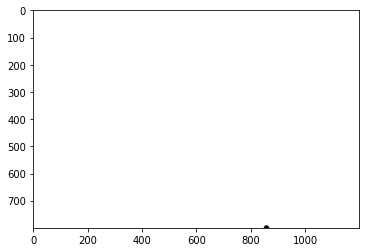

In [19]:
plt.imshow(img)
plt.savefig('test.jpg')

In [18]:
plt.savefig('test.jpg')

<Figure size 432x288 with 0 Axes>

In [113]:
np.asarray(reward).astype('float32').dtype

dtype('float32')

In [ ]:
def plot_durations():
    plt.figure(2)
    plt.clf()
    durations_t = torch.FloatTensor(episode_durations)
    plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated